In [2]:
import pandas as pd

df = pd.read_csv('df_final.csv')
df

,tconst,popularity,revenue,vote_average,vote_count,Titre_Principal,Annee_Debut,Duree_Minutes,Genres,moyenne,...,producer,writer,primaryName_director,knownForTitles_director,primaryName_producer,knownForTitles_producer,primaryName_writer,knownForTitles_writer,backdrop_path,poster_path
0,tt0113101,18.734,4257354,5.758,2357,Four Rooms,1995.0,98.0,Comedy,6.7,...,nm0004744,nm0025978,Allison Anders,"tt0104321,tt0113101,tt0173390,tt0245501",Lawrence Bender,"tt0110912,tt0266697,tt0105236,tt0361748",Allison Anders,"tt0104321,tt0113101,tt0173390,tt0245501",https://image.tmdb.org/t/p/original/c1BaOxC8bo...,https://image.tmdb.org/t/p/original/75aHn1NOYX...
1,tt0107286,10.797,12136938,6.600,284,Judgment Night,1993.0,110.0,"Action,Crime,Drama",6.6,...,nm0506420,nm0171474,Stephen Hopkins,"tt0120738,tt0097981,tt0100403,tt0352520",Gene Levy,"tt0114898,tt0083511,tt0083190,tt0112722",Lewis Colick,"tt0132477,tt0349710,tt1438254",https://image.tmdb.org/t/p/original/bGMqHn0H2U...,https://image.tmdb.org/t/p/original/3rvvpS9YPM...
2,tt0266543,68.898,940335536,7.823,17625,Finding Nemo,2003.0,100.0,"Adventure,Animation,Comedy",8.2,...,nm0910237,nm0004056,Andrew Stanton,"tt0910970,tt0266543,tt2277860,tt0120623",Graham Walters,"tt0266543,tt0105629,tt0120623,tt0114709",Andrew Stanton,"tt0910970,tt0266543,tt2277860,tt0120623",https://image.tmdb.org/t/p/original/yzqaKAhglT...,https://image.tmdb.org/t/p/original/5lc6nQc0Vh...
3,tt0109830,52.321,677387716,8.481,24593,Forrest Gump,1994.0,142.0,"Drama,Romance",8.8,...,nm0277704,nm0343165,Robert Zemeckis,"tt0088763,tt0109830,tt0118884,tt1907668",Wendy Finerman,"tt0109830,tt0303933,tt1598828,tt0116277",Winston Groom,"tt0109830,tt10028196,tt0156812,tt0090663",https://image.tmdb.org/t/p/original/3h1JZGDhZ8...,https://image.tmdb.org/t/p/original/arw2vcBveW...
4,tt0169547,26.384,356296601,8.027,10961,American Beauty,1999.0,122.0,Drama,8.3,...,nm0169260,nm0050332,Sam Mendes,"tt8579674,tt0257044,tt1074638,tt0959337",Bruce Cohen,"tt0169547,tt1045658,tt1013753,tt0109813",Alan Ball,"tt0169547,tt0248654,tt0844441,tt11327514",https://image.tmdb.org/t/p/original/DztBnZaqml...,https://image.tmdb.org/t/p/original/wby9315QzV...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,tt3393786,71.458,162146076,5.930,4349,Jack Reacher: Never Go Back,2016.0,118.0,"Action,Crime,Drama",6.1,...,nm0000129,nm0921013,Edward Zwick,"tt0325710,tt0092492,tt0138097,tt0115956",Tom Cruise,"tt0092099,tt0325710,tt0116695,tt0120755",Richard Wenk,"tt0455944,tt17024450,tt1764651,tt3766354",https://image.tmdb.org/t/p/original/ww1eIoywgh...,https://image.tmdb.org/t/p/original/cOg3UT2NYW...
5471,tt4649466,69.810,410902662,6.977,9275,Kingsman: The Golden Circle,2017.0,141.0,"Action,Adventure,Comedy",6.7,...,nm0092061,nm0963359,Matthew Vaughn,"tt1250777,tt1270798,tt2802144,tt0375912",Adam Bohling,"tt2066051,tt2802144,tt0375912,tt15009428",Jane Goldman,"tt1250777,tt2802144,tt0486655,tt1596365",https://image.tmdb.org/t/p/original/eVHVwP71el...,https://image.tmdb.org/t/p/original/34xBL6BXNY...
5472,tt3748172,15.402,0,6.391,3259,Gerald's Game,2017.0,103.0,"Drama,Horror,Thriller",6.5,...,nm1006167,nm1093039,Mike Flanagan,"tt15567174,tt6763664,tt10574558,tt5606664",Trevor Macy,"tt2388715,tt6763664,tt5606664,tt0482606",Mike Flanagan,"tt15567174,tt6763664,tt10574558,tt5606664",https://image.tmdb.org/t/p/original/jEVli6w9HN...,https://image.tmdb.org/t/p/original/32dippiypD...
5473,tt4337690,18.499,4842699,6.089,135,90 Minutes in Heaven,2015.0,121.0,Drama,4.9,...,nm0256542,nm0689187,Michael Polish,"tt0162830,tt0322659,tt0261755,tt1462411",Randall Emmett,"tt0490215,tt1302006,tt7638348,tt1855199",Michael Polish,"tt0162830,tt0322659,tt0261755,tt1462411",https://image.tmdb.org/t/p/original/iOzIbK2w0L...,https://image.tmdb.org/t/p/original/e3LKk8UdDy...


In [3]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['text_preprocessed'] = df['overview_french'].apply(preprocess_text)

# Créer une instance de TfidfVectorizer et transformer le texte prétraité en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# Appliquer TruncatedSVD pour réduire la dimensionnalité
svd = TruncatedSVD(n_components=500)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Afficher la forme de la nouvelle matrice TF-IDF
print("Reduced TF-IDF Matrix Shape:", tfidf_matrix_reduced.shape)


Reduced TF-IDF Matrix Shape: (5475, 500)


In [4]:
# Convertir les colonnes 'Annee_Debut' et 'Duree_Minutes' en entiers
df['Annee_Debut'] = df['Annee_Debut'].astype(int)
df['Duree_Minutes'] = df['Duree_Minutes'].astype(int)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tconst                   5475 non-null   object 
 1   popularity               5475 non-null   float64
 2   revenue                  5475 non-null   int64  
 3   vote_average             5475 non-null   float64
 4   vote_count               5475 non-null   int64  
 5   Titre_Principal          5475 non-null   object 
 6   Annee_Debut              5475 non-null   int64  
 7   Duree_Minutes            5475 non-null   int64  
 8   Genres                   5475 non-null   object 
 9   moyenne                  5475 non-null   float64
 10  nb_vote                  5475 non-null   float64
 11  revenue_per_vote         5475 non-null   float64
 12  popularity_vote_ratio    5475 non-null   float64
 13  year_category            5475 non-null   object 
 14  genre_count             

In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte (comme dans les étapes précédentes)
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['text_preprocessed'] = df['overview_french'].apply(preprocess_text)

# Créer une instance de TfidfVectorizer et transformer le texte prétraité en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# Appliquer TruncatedSVD pour réduire la dimensionnalité
svd = TruncatedSVD(n_components=1000)  # Par exemple, réduire à 500 dimensions
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)



# Calculer la similarité cosinus entre tous les films
cosine_sim = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

# Ajouter les genres au DataFrame pour la similarité
df['Genres'] = df['Genres'].apply(lambda x: x.split('|'))  # Assumant que les genres sont séparés par des '|'

# Créer une matrice de similarité pour les genres
genres_list = df['Genres'].tolist()
unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
genre_matrix = pd.DataFrame(0, index=df.index, columns=unique_genres)

for i, genres in enumerate(genres_list):
    for genre in genres:
        genre_matrix.at[i, genre] = 1

# Ajouter la similarité sur les titres avec TfidfVectorizer
vectorizer_titles_tfidf = TfidfVectorizer()
tfidf_matrix_titles = vectorizer_titles_tfidf.fit_transform(df['Titre_Principal'])
cosine_sim_titles_tfidf = cosine_similarity(tfidf_matrix_titles, tfidf_matrix_titles)


# Combiner la similarité cosinus, la similarité des genres et la similarité des titres (TF-IDF)
cosine_sim_genres = cosine_similarity(genre_matrix, genre_matrix)
combined_sim_tfidf = (cosine_sim + cosine_sim_genres + cosine_sim_titles_tfidf) / 3


# Fonction pour obtenir des recommandations avec TF-IDF
def get_recommendations_tfidf(title, cosine_sim=combined_sim_tfidf):
    idx = df[df['Titre_Principal'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['Titre_Principal'].iloc[movie_indices]


recommendations = get_recommendations_tfidf('Ratatouille')
print("Films recommandés pour 'Forrest Gump':")
print(recommendations)


Films recommandés pour 'Forrest Gump':
1419           The Princess and the Frog
1323                              Robots
5407                            Rock Dog
4863                              Planes
4626                  A Monster in Paris
1414                 Shrek Forever After
3249                     The Willoughbys
4857    Justin and the Knights of Valour
281                              Aladdin
4806                        Finding Dory
Name: Titre_Principal, dtype: object


In [14]:
import os
os.environ['NLTK_DATA'] = 'C:/Users/joann/AppData/Roaming/nltk_data'


In [16]:
# Exemple d'utilisation
recommendations = get_recommendations_tfidf('Ratatouille')
print("Films recommandés pour 'Forrest Gump':")
print(recommendations)

Films recommandés pour 'Forrest Gump':
1419           The Princess and the Frog
1323                              Robots
5407                            Rock Dog
4626                  A Monster in Paris
4863                              Planes
281                              Aladdin
1414                 Shrek Forever After
3249                     The Willoughbys
4857    Justin and the Knights of Valour
4635                               Turbo
Name: Titre_Principal, dtype: object


In [16]:
# Recherche le film 'Ratatouille'
recommendations = get_recommendations_tfidf('Ratatouille')
print("Films recommandés pour 'Ratatouille':")
print(recommendations)


Films recommandés pour 'Ratatouille':
1419           The Princess and the Frog
1323                              Robots
5407                            Rock Dog
4626                  A Monster in Paris
4863                              Planes
1414                 Shrek Forever After
281                              Aladdin
4857    Justin and the Knights of Valour
3249                     The Willoughbys
1990                                Bolt
Name: Titre_Principal, dtype: object


In [17]:
# Recherche le film 'Ratatouille'
recommendations = get_recommendations_tfidf('Kill Bill: Vol. 2')
print("Films recommandés pour 'Ratatouille':")
print(recommendations)

Films recommandés pour 'Ratatouille':
9                        Kill Bill: Vol. 1
3816    Kill Bill: The Whole Bloody Affair
81            Sin City: A Dame to Kill For
5367                  John Wick: Chapter 2
3202                  Deliver Us from Evil
4038                       The Equalizer 2
1162                        Crying Freeman
165                                  Shaft
1242                             Assassins
2168                   Crank: High Voltage
Name: Titre_Principal, dtype: object


In [18]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['text_preprocessed'] = df['overview_french'].apply(preprocess_text)

# Créer une instance de TfidfVectorizer et transformer le texte prétraité en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# Appliquer TruncatedSVD pour réduire la dimensionnalité
svd = TruncatedSVD(n_components=500)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Afficher la forme de la nouvelle matrice TF-IDF
print("Reduced TF-IDF Matrix Shape:", tfidf_matrix_reduced.shape)


Reduced TF-IDF Matrix Shape: (5475, 500)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['text_preprocessed'] = df['overview_french'].apply(preprocess_text)

# Créer une instance de TfidfVectorizer et transformer le texte prétraité en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# Appliquer TruncatedSVD pour réduire la dimensionnalité
svd = TruncatedSVD(n_components=500)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Afficher la forme de la nouvelle matrice TF-IDF
print("Reduced TF-IDF Matrix Shape:", tfidf_matrix_reduced.shape)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\joann\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\joann\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\joann\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['text_preprocessed'] = df['overview_french'].apply(preprocess_text)

# Créer une instance de TfidfVectorizer et transformer le texte prétraité en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# Appliquer TruncatedSVD pour réduire la dimensionnalité
svd = TruncatedSVD(n_components=500)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Afficher la forme de la nouvelle matrice TF-IDF
print("Reduced TF-IDF Matrix Shape:", tfidf_matrix_reduced.shape)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\joann\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\joann\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\joann\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [14]:
# Calculer la similarité cosinus entre tous les films
cosine_sim = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

# Ajouter les genres au DataFrame pour la similarité
df['Genres'] = df['Genres'].apply(lambda x: x.split('|'))  # Assumant que les genres sont séparés par des '|'

# Créer une matrice de similarité pour les genres
genres_list = df['Genres'].tolist()
unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
genre_matrix = pd.DataFrame(0, index=df.index, columns=unique_genres)

for i, genres in enumerate(genres_list):
    for genre in genres:
        genre_matrix.at[i, genre] = 1

# Ajouter la similarité sur les titres avec TfidfVectorizer
vectorizer_titles_tfidf = TfidfVectorizer()
tfidf_matrix_titles = vectorizer_titles_tfidf.fit_transform(df['Titre_Principal'])
cosine_sim_titles_tfidf = cosine_similarity(tfidf_matrix_titles, tfidf_matrix_titles)

# Combiner la similarité cosinus, la similarité des genres et la similarité des titres (TF-IDF)
cosine_sim_genres = cosine_similarity(genre_matrix, genre_matrix)
combined_sim_tfidf = (cosine_sim + cosine_sim_genres + cosine_sim_titles_tfidf) / 3

# Fonction pour obtenir des recommandations avec TF-IDF
def get_recommendations_tfidf(title, cosine_sim=combined_sim_tfidf):
    idx = df[df['Titre_Principal'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['Titre_Principal'].iloc[movie_indices]

# Exemple d'utilisation
recommendations_tfidf = get_recommendations_tfidf('Forrest Gump')
print("Recommandations pour 'Forrest Gump' avec TF-IDF:")
print(recommendations_tfidf)


NameError: name 'tfidf_matrix_reduced' is not defined

In [15]:
# moteur_recommandation.py

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte (comme dans les étapes précédentes)
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['text_preprocessed'] = df['overview_french'].apply(preprocess_text)

# Créer une instance de TfidfVectorizer et transformer le texte prétraité en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# Appliquer TruncatedSVD pour réduire la dimensionnalité
svd = TruncatedSVD(n_components=1000)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Calculer la similarité cosinus entre tous les films
cosine_sim = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

# Ajouter les genres au DataFrame pour la similarité
df['Genres'] = df['Genres'].apply(lambda x: x.split('|'))  # En supposant que les genres sont séparés par '|'

# Créer une matrice de similarité pour les genres
genres_list = df['Genres'].tolist()
unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
genre_matrix = pd.DataFrame(0, index=df.index, columns=unique_genres)

for i, genres in enumerate(genres_list):
    for genre in genres:
        genre_matrix.at[i, genre] = 1

# Ajouter la similarité sur les titres avec TfidfVectorizer
vectorizer_titles_tfidf = TfidfVectorizer()
tfidf_matrix_titles = vectorizer_titles_tfidf.fit_transform(df['Titre_Principal'])
cosine_sim_titles_tfidf = cosine_similarity(tfidf_matrix_titles, tfidf_matrix_titles)

# Combiner la similarité cosinus, la similarité des genres et la similarité des titres (TF-IDF)
cosine_sim_genres = cosine_similarity(genre_matrix, genre_matrix)
combined_sim_tfidf = (cosine_sim + cosine_sim_genres + cosine_sim_titles_tfidf) / 3

# Fonction pour obtenir des recommandations avec TF-IDF
def get_recommendations_tfidf(title, cosine_sim=combined_sim_tfidf):
    idx = df[df['Titre_Principal'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df.loc[movie_indices, ['tconst', 'Titre_Principal', 'poster_path']]


ValueError: BLIS support requires blis: pip install blis

In [4]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte (comme dans les étapes précédentes)
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column]

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(preprocess_text)

class GenreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        genres_list = X.apply(lambda x: x.split('|'))
        unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
        genre_matrix = pd.DataFrame(0, index=X.index, columns=unique_genres)
        
        for i, genres in enumerate(genres_list):
            for genre in genres:
                genre_matrix.at[i, genre] = 1
        
        return genre_matrix

# Pipeline pour le texte des résumés
text_pipeline = Pipeline([
    ('extract', ColumnExtractor('overview_french')),
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_df=0.99, min_df=2)),
    ('svd', TruncatedSVD(n_components=1000)),
])

# Pipeline pour les genres
genre_pipeline = Pipeline([
    ('extract', ColumnExtractor('Genres')),
    ('transformer', GenreTransformer()),
])

# Pipeline pour les titres
title_pipeline = Pipeline([
    ('extract', ColumnExtractor('Titre_Principal')),
    ('tfidf', TfidfVectorizer()),
])

# Combiner les transformations
combined_features = FeatureUnion([
    ('text_pipeline', text_pipeline),
    ('genre_pipeline', genre_pipeline),
    ('title_pipeline', title_pipeline),
])

# Appliquer les transformations et calculer les similarités
combined_matrix = combined_features.fit_transform(df)

# Calculer la similarité cosinus combinée
cosine_sim = cosine_similarity(combined_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in df['Titre_Principal'].values:
        return f"Le titre '{title}' n'a pas été trouvé dans la base de données."
    
    idx = df[df['Titre_Principal'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df.loc[movie_indices, ['tconst', 'Titre_Principal', 'poster_path']]

# Exemple d'utilisation
recommandations = get_recommendations('Kill Bill: Vol. 1')
print(recommandations)



Le titre 'Un titre de film' n'a pas été trouvé dans la base de données.


In [5]:
recommandations = get_recommendations('Kill Bill: Vol. 1')
print(recommandations)

         tconst                     Titre_Principal  \
143   tt0378194                   Kill Bill: Vol. 2   
3816  tt6019206  Kill Bill: The Whole Bloody Affair   
81    tt0458481        Sin City: A Dame to Kill For   
789   tt0443632                        The Sentinel   
3222  tt8368408                 Gunpowder Milkshake   
4935  tt2265171                          The Raid 2   
1162  tt0112750                      Crying Freeman   
4959  tt2044801                                Kite   
3664  tt6116856              The Night Comes for Us   
4485  tt1578882                      Elephant White   

                                            poster_path  
143   https://image.tmdb.org/t/p/original/2yhg0mZQMh...  
3816  https://image.tmdb.org/t/p/original/zomX76Pf3n...  
81    https://image.tmdb.org/t/p/original/50kALxDX4m...  
789   https://image.tmdb.org/t/p/original/wPFVeVYuFh...  
3222  https://image.tmdb.org/t/p/original/5AaKulwpUt...  
4935  https://image.tmdb.org/t/p/original/olA3

In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte (comme dans les étapes précédentes)
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column]

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(preprocess_text)

class GenreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        genres_list = X.apply(lambda x: x.split('|'))
        unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
        genre_matrix = pd.DataFrame(0, index=X.index, columns=unique_genres)
        
        for i, genres in enumerate(genres_list):
            for genre in genres:
                genre_matrix.at[i, genre] = 1
        
        return genre_matrix

# Pipeline pour le texte des résumés
text_pipeline = Pipeline([
    ('extract', ColumnExtractor('overview_french')),
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_df=0.99, min_df=2)),
    ('svd', TruncatedSVD(n_components=1000)),
])

# Pipeline pour les genres
genre_pipeline = Pipeline([
    ('extract', ColumnExtractor('Genres')),
    ('transformer', GenreTransformer()),
])

# Pipeline pour les titres
title_pipeline = Pipeline([
    ('extract', ColumnExtractor('Titre_Principal')),
    ('tfidf', TfidfVectorizer()),
])

# Combiner les transformations
combined_features = FeatureUnion([
    ('text_pipeline', text_pipeline),
    ('genre_pipeline', genre_pipeline),
    ('title_pipeline', title_pipeline),
])

# Fonction pour afficher les étapes du pipeline
def print_pipeline_steps(pipeline):
    if isinstance(pipeline, Pipeline):
        for name, step in pipeline.steps:
            print(f"Step name: {name}, Step type: {type(step)}")
            if isinstance(step, Pipeline):
                print_pipeline_steps(step)
    elif isinstance(pipeline, FeatureUnion):
        for name, transformer in pipeline.transformer_list:
            print(f"Transformer name: {name}, Transformer type: {type(transformer)}")
            if isinstance(transformer, Pipeline):
                print_pipeline_steps(transformer)

# Afficher les étapes du pipeline combiné
print("Combined pipeline steps:")
print_pipeline_steps(combined_features)

# Appliquer les transformations et calculer les similarités
combined_matrix = combined_features.fit_transform(df)

# Calculer la similarité cosinus combinée
cosine_sim = cosine_similarity(combined_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Vérifie si le titre fourni est présent dans la colonne 'Titre_Principal' du DataFrame
    if title not in df['Titre_Principal'].values:
        return f"Le titre '{title}' n'a pas été trouvé dans la base de données."
    
    # Trouve l'index de la ligne correspondant au titre dans le DataFrame
    idx = df[df['Titre_Principal'] == title].index[0]
    
    # Récupère les scores de similarité pour le film donné
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Trie les scores de similarité en ordre décroissant
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Prend les 10 films les plus similaires (en excluant le premier qui est le film lui-même)
    sim_scores = sim_scores[1:11]
    
    # Récupère les indices des films correspondants
    movie_indices = [i[0] for i in sim_scores]
    
    # Retourne un DataFrame contenant les informations des films recommandés
    return df.loc[movie_indices, ['tconst', 'Titre_Principal', 'poster_path']]

# Exemple d'utilisation de la fonction
recommandations = get_recommendations('Kill Bill: Vol. 2')
print(recommandations)



Combined pipeline steps:
Transformer name: text_pipeline, Transformer type: <class 'sklearn.pipeline.Pipeline'>
Step name: extract, Step type: <class '__main__.ColumnExtractor'>
Step name: preprocessor, Step type: <class '__main__.TextPreprocessor'>
Step name: tfidf, Step type: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Step name: svd, Step type: <class 'sklearn.decomposition._truncated_svd.TruncatedSVD'>
Transformer name: genre_pipeline, Transformer type: <class 'sklearn.pipeline.Pipeline'>
Step name: extract, Step type: <class '__main__.ColumnExtractor'>
Step name: transformer, Step type: <class '__main__.GenreTransformer'>
Transformer name: title_pipeline, Transformer type: <class 'sklearn.pipeline.Pipeline'>
Step name: extract, Step type: <class '__main__.ColumnExtractor'>
Step name: tfidf, Step type: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
          tconst                     Titre_Principal  \
9      tt0266697                   Kill Bill: Vol. 1  

In [8]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from sklearn import set_config
from sklearn.utils import estimator_html_repr
import graphviz
from IPython.display import display, HTML

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte (comme dans les étapes précédentes)
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column]

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(preprocess_text)

class GenreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        genres_list = X.apply(lambda x: x.split('|'))
        unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
        genre_matrix = pd.DataFrame(0, index=X.index, columns=unique_genres)
        
        for i, genres in enumerate(genres_list):
            for genre in genres:
                genre_matrix.at[i, genre] = 1
        
        return genre_matrix

# Pipeline pour le texte des résumés
text_pipeline = Pipeline([
    ('extract', ColumnExtractor('overview_french')),
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_df=0.99, min_df=2)),
    ('svd', TruncatedSVD(n_components=1000)),
])

# Pipeline pour les genres
genre_pipeline = Pipeline([
    ('extract', ColumnExtractor('Genres')),
    ('transformer', GenreTransformer()),
])

# Pipeline pour les titres
title_pipeline = Pipeline([
    ('extract', ColumnExtractor('Titre_Principal')),
    ('tfidf', TfidfVectorizer()),
])

# Combiner les transformations
combined_features = FeatureUnion([
    ('text_pipeline', text_pipeline),
    ('genre_pipeline', genre_pipeline),
    ('title_pipeline', title_pipeline),
])

# Afficher l'arbre du pipeline
set_config(display='diagram')
display(HTML(estimator_html_repr(combined_features)))

# Appliquer les transformations et calculer les similarités
combined_matrix = combined_features.fit_transform(df)

# Calculer la similarité cosinus combinée
cosine_sim = cosine_similarity(combined_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in df['Titre_Principal'].values:
        return f"Le titre '{title}' n'a pas été trouvé dans la base de données."
    
    idx = df[df['Titre_Principal'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df.loc[movie_indices, ['tconst', 'Titre_Principal', 'poster_path']]

# Exemple d'utilisation
recommandations = get_recommendations('Kill Bill: Vol. 1')
print(recommandations)


         tconst                     Titre_Principal  \
143   tt0378194                   Kill Bill: Vol. 2   
3816  tt6019206  Kill Bill: The Whole Bloody Affair   
81    tt0458481        Sin City: A Dame to Kill For   
789   tt0443632                        The Sentinel   
3222  tt8368408                 Gunpowder Milkshake   
4935  tt2265171                          The Raid 2   
1162  tt0112750                      Crying Freeman   
4959  tt2044801                                Kite   
4485  tt1578882                      Elephant White   
2067  tt1032755                          RocknRolla   

                                            poster_path  
143   https://image.tmdb.org/t/p/original/2yhg0mZQMh...  
3816  https://image.tmdb.org/t/p/original/zomX76Pf3n...  
81    https://image.tmdb.org/t/p/original/50kALxDX4m...  
789   https://image.tmdb.org/t/p/original/wPFVeVYuFh...  
3222  https://image.tmdb.org/t/p/original/5AaKulwpUt...  
4935  https://image.tmdb.org/t/p/original/olA3

Ce que vous voyez dans l'image est une représentation graphique d'un pipeline de machine learning utilisant `FeatureUnion` de `scikit-learn`. `FeatureUnion` permet de combiner plusieurs transformations de manière parallèle, et de les concaténer dans une seule matrice de caractéristiques. Cela est utile pour traiter différents types de données ou appliquer plusieurs transformations à différentes parties des données en même temps. 

Voici une explication détaillée de chaque composant et de l'utilité globale de ce pipeline :

### Composants du pipeline

1. **text_pipeline** :
    - **ColumnExtractor** : Extrait la colonne `overview_french` du DataFrame.
    - **TextPreprocessor** : Applique des transformations de texte comme la mise en minuscule, la suppression des chiffres, la suppression de la ponctuation, le tokenization, le stemming, et la lemmatisation.
    - **TfidfVectorizer** : Convertit le texte prétraité en une matrice de caractéristiques TF-IDF.
    - **TruncatedSVD** : Réduit la dimensionnalité de la matrice TF-IDF pour simplifier le modèle et améliorer les performances.

2. **genre_pipeline** :
    - **ColumnExtractor** : Extrait la colonne `Genres` du DataFrame.
    - **GenreTransformer** : Transforme la colonne des genres en une matrice binaire où chaque colonne représente un genre unique et chaque ligne indique si le film appartient à ce genre.

3. **title_pipeline** :
    - **ColumnExtractor** : Extrait la colonne `Titre_Principal` du DataFrame.
    - **TfidfVectorizer** : Convertit les titres en une matrice de caractéristiques TF-IDF.

### Utilité du pipeline

Ce pipeline est utilisé pour préparer différentes sources de données (résumés, genres, titres) et les combiner en une seule matrice de caractéristiques. Cette matrice combinée peut ensuite être utilisée pour calculer des similarités cosinus entre les films, ce qui est la base d'un moteur de recommandation.

### Comment lire ce pipeline

- **FeatureUnion** : Combine les sorties des trois sous-pipelines (`text_pipeline`, `genre_pipeline`, et `title_pipeline`).
- **text_pipeline** : Prépare les résumés des films.
- **genre_pipeline** : Prépare les genres des films.
- **title_pipeline** : Prépare les titres des films.

L'image montre clairement les étapes de transformation appliquées à chaque type de données. Les sous-pipelines traitent les données en parallèle, puis leurs sorties sont combinées.

### Pourquoi utiliser ce pipeline ?

L'objectif est de capturer différentes facettes des films (résumé, genres, titre) et de les transformer en un format compatible pour le calcul de similarité. Cela permet de construire un moteur de recommandation plus robuste et précis, car il prend en compte plusieurs aspects des films pour déterminer leurs similarités.

En résumé, ce pipeline permet de :

- Prétraiter les textes pour en extraire les caractéristiques les plus importantes.
- Transformer les genres en une représentation binaire.
- Utiliser les titres des films comme caractéristiques supplémentaires.
- Combiner toutes ces caractéristiques pour calculer des similarités entre les films et fournir des recommandations pertinentes.

In [17]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from sklearn import set_config
from sklearn.utils import estimator_html_repr
from IPython.display import display, HTML

# Charger le DataFrame
df = pd.read_csv('df_final.csv')

# Prétraitement du texte
nlp = spacy.load('fr_core_news_sm')
stop_words = set(stopwords.words('french'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column]

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(preprocess_text)

class GenreTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        genres_list = X.apply(lambda x: x.split('|'))
        unique_genres = list(set([genre for sublist in genres_list for genre in sublist]))
        genre_matrix = pd.DataFrame(0, index=X.index, columns=unique_genres)
        
        for i, genres in enumerate(genres_list):
            for genre in genres:
                genre_matrix.at[i, genre] = 1
        
        return genre_matrix

# Pipeline pour le texte des résumés
text_pipeline = Pipeline([
    ('extract', ColumnExtractor('overview_french')),
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1,2))),
    ('svd', TruncatedSVD(n_components=300)),
])

# Pipeline pour les genres
genre_pipeline = Pipeline([
    ('extract', ColumnExtractor('Genres')),
    ('transformer', GenreTransformer()),
])

# Pipeline pour les titres
title_pipeline = Pipeline([
    ('extract', ColumnExtractor('Titre_Principal')),
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1,2))),
])

# Combiner les transformations
combined_features = FeatureUnion([
    ('text_pipeline', text_pipeline),
    ('genre_pipeline', genre_pipeline),
    ('title_pipeline', title_pipeline),
])

# Afficher l'arbre du pipeline
set_config(display='diagram')
display(HTML(estimator_html_repr(combined_features)))

# Appliquer les transformations et calculer les similarités
combined_matrix = combined_features.fit_transform(df)

# Calculer la similarité cosinus combinée
cosine_sim = cosine_similarity(combined_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in df['Titre_Principal'].values:
        return f"Le titre '{title}' n'a pas été trouvé dans la base de données."
    
    idx = df[df['Titre_Principal'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df.loc[movie_indices, ['tconst', 'Titre_Principal', 'poster_path']]

# Exemple d'utilisation
recommandations = get_recommendations('Batman Forever')
print(recommandations)


         tconst                                    Titre_Principal  \
108   tt0096895                                             Batman   
5418  tt1464335                                          Uncharted   
27    tt0087469               Indiana Jones and the Temple of Doom   
4544  tt0127759        L.E.T.H.A.L. Ladies: Return to Savage Beach   
92    tt0367882  Indiana Jones and the Kingdom of the Crystal S...   
5173  tt2295722                                      Falcon Rising   
26    tt0082971                            Raiders of the Lost Ark   
4190  tt0091344                                    King Kong Lives   
29    tt0097576                 Indiana Jones and the Last Crusade   
4337  tt0097991                         No Retreat, No Surrender 2   

                                            poster_path  
108   https://image.tmdb.org/t/p/original/cij4dd21v2...  
5418  https://image.tmdb.org/t/p/original/rJHC1RUORu...  
27    https://image.tmdb.org/t/p/original/n9WlJCilqS...

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# 1. Automatisation des Tâches d'ici 2030
years = [2020, 2025, 2030]
automated_tasks = [25, 40, 50]  # Estimations des tâches automatisées en pourcentage

# Création du graphique avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(years, automated_tasks, marker='o', linestyle='-', color='b', label="Tâches automatisées (%)")
plt.title("Projection de l'Automatisation des Tâches jusqu'en 2030")
plt.xlabel("Année")
plt.ylabel("Pourcentage de Tâches Automatisées")
plt.grid(True)
plt.legend()
plt.savefig('automatisation_taches.png')  # Sauvegarder l'image

# 2. Adoption de l'IA depuis 2017
years_adoption = [2017, 2018, 2019, 2020, 2021, 2022]
adoption_rates = [20, 30, 35, 40, 45, 50]  # Pourcentages d'adoption de l'IA

# Création du graphique avec Plotly Express
df_adoption = pd.DataFrame({'Année': years_adoption, 'Adoption de l\'IA (%)': adoption_rates})
fig_adoption = px.line(df_adoption, x='Année', y="Adoption de l'IA (%)", title="Adoption de l'IA depuis 2017",
                       markers=True)
fig_adoption.update_layout(xaxis_title="Année", yaxis_title="Pourcentage d'Adoption de l'IA")

# Affichage du graphique avec Plotly Express sans sauvegarde d'image
fig_adoption.show()


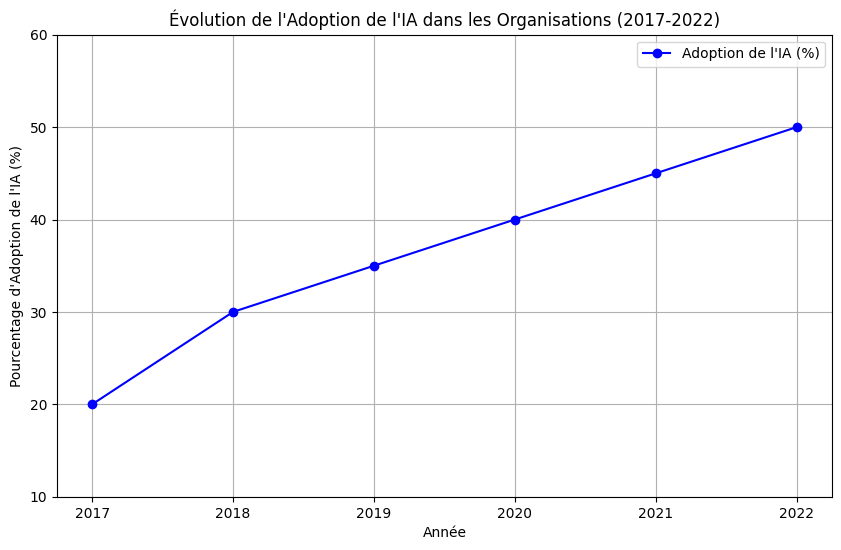

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Données sur l'adoption de l'IA
years_adoption = [2017, 2018, 2019, 2020, 2021, 2022]
adoption_rates = [20, 30, 35, 40, 45, 50]  # Pourcentages d'adoption de l'IA

# Création du DataFrame
df_adoption = pd.DataFrame({'Année': years_adoption, 'Adoption de l\'IA (%)': adoption_rates})

# Création du graphique avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_adoption['Année'], df_adoption['Adoption de l\'IA (%)'], marker='o', linestyle='-', color='b', label="Adoption de l'IA (%)")
plt.title("Évolution de l'Adoption de l'IA dans les Organisations (2017-2022)")
plt.xlabel("Année")
plt.ylabel("Pourcentage d'Adoption de l'IA (%)")
plt.ylim(10, 60)
plt.grid(True)
plt.xticks(df_adoption['Année'])
plt.yticks(range(10, 61, 10))
plt.legend()

# Sauvegarde du graphique en tant qu'image
plt.savefig('adoption_ia_updated_matplotlib.png')
plt.show()
